In [50]:
import numpy as np
import scipy.io as scio

In [51]:
offline_data = scio.loadmat("offline_data_random.mat")
online_data = scio.loadmat("online_data.mat")

In [52]:
offline_location, offline_rss = offline_data["offline_location"][0:1000,:],offline_data["offline_rss"][0:1000,:]
trace, rss = online_data["trace"][0:1000,:],online_data["rss"][0:1000,:]
#offline_location, offline_rss = offline_data["offline_location"],offline_data["offline_rss"]
#trace, rss = online_data["trace"][0:1000,:], online_data["rss"][0:1000,:]

In [53]:
del offline_data
del online_data

In [54]:
def accuracy(predictions, labels):
    return np.mean(np.sqrt(np.sum((predictions - labels)**2,1)))

In [55]:
from sklearn import neighbors
knn_reg = neighbors.KNeighborsRegressor(40,weights='uniform',metric="euclidean")
predictions = knn_reg.fit(offline_rss, offline_location).predict(rss)
acc = accuracy(predictions, trace)
print("knn_reg accuracy: {0}".format(acc/100),"m")

knn_reg accuracy: 2.556849148835346 m


In [56]:
labels = np.round(offline_location[:,0]/100.0)*100 + np.round(offline_location[:,1]/100)
knn_cls = neighbors.KNeighborsClassifier(n_neighbors=40, weights = "uniform",metric="euclidean")
predict_labels = knn_cls.fit(offline_rss, labels).predict(rss)
x = np.floor(predict_labels / 100.0)
y = np.floor(predict_labels - x * 100)
predictions = np.column_stack((x,y)) * 100
acc = accuracy(predictions, trace)
print("knn_cls accuracy: ",(acc/100),"m")

knn_cls accuracy:  3.39323527601 m


In [71]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors":range(1,50)}
knn_reg = neighbors.KNeighborsRegressor(weights="uniform", metric="euclidean")
clf = GridSearchCV(knn_reg, parameters)
clf.fit(offline_rss, offline_location)
scores = clf.cv_results_["mean_test_score"]
k = np.argmax(scores)

ERROR: Line magic function `%matplomatplotlibotlibinline` not found.


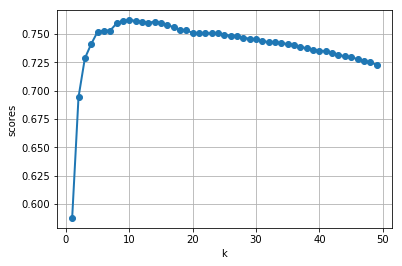

In [72]:
%matplomatplotlibotlibinline
plt.plot(range(1,scores.shape[0] + 1), scores, '-o', linewidth=2.0)
plt.xlabel("k")
plt.ylabel("scores")
plt.grid(True)
plt.show()